# Statistics Advanced-3

Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

Ans. Estimation statistics is the use of various statistical methods and techniques to derive information about a larger population data from the available sample data. 

**Point Estimate** - a point estimate is a single value that is used to estimate or find the approximate value of any given population parameter. For example, if we calculate the sample mean and estimate the population mean based on that then it is an example of point estimate.

**Interval Estimate** - here we provide a range of values called the confidence interval. We say that the population parameter is likely to fall in the given range. For example, we can have a confidence interval of 95% from 40-45 then it means there are 95% chance that the calclulated population mean from samp0le mean falls in this range.

Q2. Write a Python function to estimate the population mean using a sample mean and standard
deviation.

Ans. If we have the sample mean $\bar{x}$, sample standard deviation $s$, then we can use the t-distribution formula to construct a confidence interval for the population mean using the following formula:
$$CI = \bar{x} \pm t_{\alpha/2} \left(\frac{s}{\sqrt{n}}\right)$$
where,
- $\alpha$ is the significance value
- $n$  is the sample size
- $t_{\alpha/2}$ is the t value from the t table for $\alpha/2$, and with degree of freedom $n-1$

The formula can be implemented using a python function in the following way:

In [25]:
def test(mean, std, sample_size, confidence=95, tail=2):
    from scipy import stats
    import math
    alpha = 1-(confidence/100)
    t = stats.t.isf(alpha/tail, sample_size-1)
    margin = (t*std)/math.sqrt(sample_size)
    CI = (mean-margin, mean+margin)
    return f"The {confidence}% confidence interval of population mean is {CI}"

The above function takes 5 arguments:
- mean: the given sample mean
- std: the given smaple standard deviation
- sample_size: the size of given sample
- confidence: this is the confidence level, if it is not given, the derfault level is 95%
- tail: this specifies whether it is a one or two tail test. The default value is 2

It returns output in the form of a tuple which gives us the range in which our population mean lies.

An example is as shown:

In [11]:
test(75, 10, 50, 95, 2)

'The 95% confidence interval of population mean is (72.15803144877627, 77.84196855122373)'

In [12]:
test(140, 20, 30)

'The 95% confidence interval of population mean is (132.531877264838, 147.468122735162)'

Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

Ans. Hypothesis testing is a fundamental concept in statistics used to make decisions about population parameters based on sample data. Here we formulate two hypotheses, the null hypothesis (denoted as $H_0$) and the alternate hypothesis (denoted as $H_1$). Then we use the sample data to check which of the two hypothesis is true. 

Hypothesis testing is used to determine whether there is enough evidence to support the null hypothesis. Depending on result, we say that either we reject the null hypothesis or we fail to reject the null hypothesis.

Importance of Hypothesis testing - Hypothesis testing is used to check the validity of scienntific theories. It help us in making decision and policies based on data. It is used in various research fields. For example hypothesis testing can help us determine whether a new medication is effective or not. 

Q4. Create a hypothesis that states whether the average weight of male college students is greater than
the average weight of female college students.

Ans. Let the average weight of male college students is $\bar{x}_m$ and the average weight of female college students is $\bar{x}_f$. The Null and Alternate Hypothesis are as follows:

- **Null Hypothesis** $$H_0 = \bar{x}_m \gt \bar{x}_f$$
- **Alternate Hypothesis** $$H_1 = \bar{x}_m \le \bar{x}_f$$

Q5. Write a Python script to conduct a hypothesis test on the difference between two population means,
given a sample from each population.

Ans. The formula used for this case is:
$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p.\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

where $s_p$ is the pooled standard deviation
$$ s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$

- $s_1$ : standard deviation of first sample
- $s_2$ : standard deviation of second sample
- $\bar{x}_1$ : mean of first sample 
- $\bar{x}_2$ : mean of second sample 
- $n_1$ : sample size of first sample 
- $n_2$ : sample size of second sample 

A python function to achieve this is as shown:

In [2]:
def test_2(mean1, mean2, std1, std2, n1, n2, significance_value=0.05):
    import scipy.stats as stat
    import numpy as np
    
    dof =  n1 + n2 - 2
    
    std_pooled = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    
    t = (mean1 - mean2) / (std_pooled * np.sqrt(1/n1 + 1/n2))
    
    critical = stat.t.ppf(1-significance_value/2, dof)
    
    print(f"t : {t}")
    
    print(f"critical value : {critical}")
    if t>critical or t<-critical:
        print("We reject the Null Hypothesis. Means are not equal")
    else:
        print("We fail to reject the Null Hypothesis. Means are equal")


In [7]:
test_2(14.95,22.29, 6.84, 5.32, 13, 10)

t : -2.799166888569627
critical value : 2.079613844727662
We reject the Null Hypothesis. Means are not equal


Q6: What is a null and alternative hypothesis? Give some examples.

Ans. Null and alternative hypotheses are the two statements formulated in the Hypothesis testing process. 

- **Null Hypothesis** : It is denoted by $H_0$. This is the initial assumption. Here we assume that there is no change between the observed values and population parameters. It is the condition of no effect. We assume there are no changes.

- **Alternative hypothesis** : It is denoted by $H_1$. This is the condition of change. It is contradictory to the null hypothesis. It is the case of differennce between our parameters.

Examples are as follows:

- Suppose the mean IQ of a populaiton is $\mu_0$. Now a medication is tested on a sample and the new IQ of sample is $\mu$. Now if we have to test whether the medication was effective or not, then Null and Alternative Hypotheses are as follows:
    - $H_0$ : $\mu = \mu_0$ : This means sample and population mean are equal and the medication had no effect.
    - $H_1$ : $\mu \ne \mu_0 $ : This means the means are not equal and the medication had some effect. If $\mu < \mu_0$, then the medication reduced IQ. But if $\mu > \mu_0$, then this means medication improved the IQ.
- Suppose a company claims that average life of a bulb is at least 5 years. A sample is collected and average life calculated to check if this claim is true. Suppose the average life of sample is $\mu$. Then Null and Alternative Hypotheses are as follows:
    - $H_0$ : $\mu \ge 5$ : This means the average life is at least 5 years and claim of company is true.
    - $H_1$ : $\mu \le 5$ : This means the average life is less than 5yrs and claim of company is false.
    
The first example will use a two -tailed test while the second will use one-tail test.

Q7: Write down the steps involved in hypothesis testing.

Ans. The steps involved in Hypothesis testing are:

1. **Formulating Hypotheses:**
    - Null Hypothesis ($H_0$): This hypothesis represents the default assumption. It suggests that any observed effect is due to random chance or sampling variability.
    - Alternative Hypothesis ($H_1$): This hypothesis presents the researcher's claim or the effect they are trying to find evidence for. It suggests that there is a real and significant difference or effect in the population.
2. **Collecting and Analyzing Data:** Data is collected from a sample, and statistical tests are performed to assess whether the sample data provides enough evidence to reject the null hypothesis in favor of the alternative hypothesis.
3. **Calculating Test Statistics:** Various test statistics are calculated based on the sample data. These statistics depend on the specific hypothesis test being used (e.g., t-test, z-test, chi-squared test, etc.).
4. **Determining Significance:** The calculated test statistic is compared to a critical value or p-value. The critical value is determined based on the chosen significance level (&alpha:), while the p-value indicates the probability of obtaining a result as extreme as, or more extreme than, the observed result if the null hypothesis is true.
5. **Making a Decision:** Based on the comparison of the test statistic and the critical value or p-value:
    - If the p-value is less than or equal to the significance level (&alpha;), we reject the null hypothesis in favor of the alternative hypothesis. This suggests that there is evidence to support the claim made in the alternative hypothesis.
    - If the p-value is greater than the significance level, we fail to reject the null hypothesis. 

Q8. Define p-value and explain its significance in hypothesis testing.

Ans. The p-value or the probability value is a number calculated using any statistical test.  The p-value gives the likelihood, the chance of getting the observed result if the null hypothesis is true. 

In Hypothesis Testing, p-value is used to determine whether we accept or reject the null hypothesis.

- If the p-value is less than or equal to the significance level (&alpha;), we reject the null hypothesis in favor of the alternative hypothesis. This suggests that there is evidence to support the claim made in the alternative hypothesis.
- If the p-value is greater than the significance level, we fail to reject the null hypothesis. 

Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom
parameter set to 10.

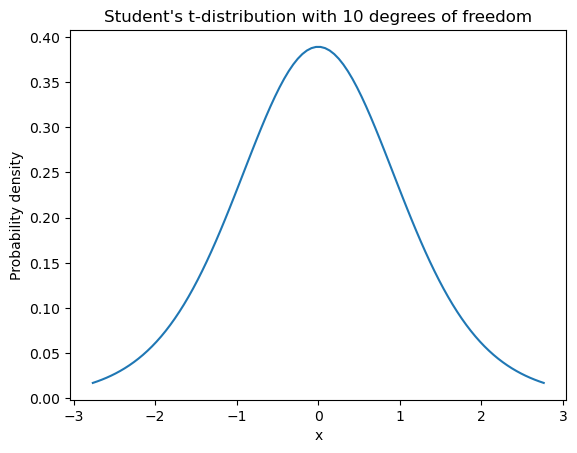

In [21]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Set degrees of freedom
df = 10

# Create x values
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)

# Compute probability density function
y = t.pdf(x, df)

# Plot the graph
plt.plot(x, y)
plt.title(f"Student's t-distribution with {df} degrees of freedom")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.show()

Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

Ans. The formula used in this scenario will be:

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p.\sqrt{\frac{2}{n}}} $$

where $s_p$ is the pooled standard deviation
$$ s_p = \sqrt{\frac{s_1^2 + s_2^2}{2}}$$

- $s_1$ : standard deviation of first sample
- $s_2$ : standard deviation of second sample
- $\bar{x}_1$ : mean of first sample 
- $\bar{x}_2$ : mean of second sample 
- $n$ : sample size

A python function is as shown:

In [5]:
def test_3(mean1, mean2, s1, s2, size, significance_value=0.05):
    import scipy.stats as stat
    import numpy as np
    
    dof = 2*(size-1)
    std_pooled = np.sqrt((s1**2 + s2**2)/2)
    t = (mean1-mean2)/np.sqrt(2/size)
    critical = stat.t.ppf(1-significance_value/2, dof)
    
    print(f"t : {t}")
    print(f"critical value : {critical}")
    if t>critical or t<-critical:
        print("We reject the Null Hypothesis. Means are not equal")
    else:
        print("We fail to reject the Null Hypothesis. Means are equal")
    

For example:

In [6]:
test_3(25, 27, 5, 6, 50)

t : -10.0
critical value : 1.984467454426692
We reject the Null Hypothesis. Means are not equal


Q11: What is Student's t distribution? When to use the t-Distribution.

Ans. Student's t distribution, also known as t-distribution, is a kind of distribution similar ot Z-distribution which is used to calculate population parameters from sample parameters. 

t-distribution is ussed when:
- sample size, n, is not large, it is small
- when the population standard deviation is nopt available


Q12: What is t-statistic? State the formula for t-statistic.

Ans. A t-statistic is a value used in Hypothesis Tesiting using the Student's t-distribution.
It's formula is:

$$ t = \frac{\bar{x} - \mu }{\frac{S}{\sqrt{n}}} $$

where
- $\bar{x}$ is the sample mean
- $\mu$ is the population mean
- $S$ is sample standard deviation
- $n$ is the sample size

Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random
sample of 50 days and find the sample mean revenue to be ${$500}$ with a standard deviation of ${$50}$. 
Estimate the population mean revenue with a 95% confidence interval.

Ans. We have $n$=50, $\bar{x} = 500$, $s=50$, and $\alpha=1-0.95=0.05$

We can use t-distribution formaula to find the confidence interval of population mean:
$$CI = \bar{x} \pm t_{\alpha/2}. \left(\frac{s}{\sqrt{n}}\right)$$

where $t_{\alpha/2}. \left(\frac{s}{\sqrt{n}}\right)$ is the margin of error.

Solution using pyhton is as follows:

In [22]:
from scipy import stats
import math

sample_mean = 500
std = 50
n = 50
confidence = 95
alpha = 1-(confidence/100)

t = stats.t.isf(alpha/2, n-1)
margin = (t*std)/math.sqrt(n)
CI = (sample_mean-margin, sample_mean+margin)
print(f"The {confidence}% confidence interval of population mean is {CI}")

The 95% confidence interval of population mean is (485.79015724388137, 514.2098427561186)


Also, using the function created in Q2, we get

In [23]:
test(500,50,50,95)

'The 95% confidence interval of population mean is (485.79015724388137, 514.2098427561186)'

Both results are same, thus our function is also accurate.

Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a
clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a
standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

Ans. We have $\bar{x}=8$, $n=100$, $S=3$, $\alpha=0.05$. The null and alternative hypothesis are:
- $H_0$: $\mu=10$
- $H_1$: $\mu \ne 10$

As population standard deviation is not given, we will use t-statistics. Using Pyhton, the solution can be obtained as shown:

In [24]:
import scipy.stats as stat
import numpy as np

pop_mean = 10
sample_mean = 8
std = 3
significance_level = 0.05
sample_size = 100
dof =sample_size-1

t = (sample_mean-pop_mean)/(std/np.sqrt(sample_size))
p = stat.t.ppf(1-significance_level/2, dof)

print("RESULT:")

if t<-p or t>p:
    print("We reject the Null Hypothesis. The new drug will not decrease blood pressure by 10 mmHg")
else:
    print("We accept the Null Hypothesis. The new drug will decrease blood pressure by 10 mmHg")


RESULT:
We reject the Null Hypothesis. The new drug will not decrease blood pressure by 10 mmHg


Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5
pounds with a significance level of 0.01.

Ans. We have $\bar{x}=4.8$, $n=25$, $\sigma=0.5$, $\alpha=0.01$. The null and alternative hypothesis are:
- $H_0$: $\mu=5$
- $H_1$: $\mu \lt 5$ (we will use 1-tail test)

 Using Pyhton, the solution can be obtained as shown:

In [7]:
import scipy.stats as stat
import numpy as np

pop_mean = 5
sample_mean = 4.8
std = 0.5
significance_level = 0.01
sample_size = 25

z = (sample_mean-pop_mean)/(std/np.sqrt(sample_size))

p = stat.norm.cdf(z)

print("RESULT:")

if z<p:
    print("We reject the Null Hypothesis. Thus the true mean weight of the products is less than 5 pounds")
else:
    print("We fail to reject the Null Hypothesis. Thus true mean weight of the products is less than 5 pounds")


RESULT:
We reject the Null Hypothesis. Thus the true mean weight of the products is less than 5 pounds


Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1=30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

Ans. The formula used here is:
$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p.\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

where $s_p$ is the pooled standard deviation
$$ s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$


In [11]:
import numpy as np
import scipy.stats as stat

n1= 30
mean_1=80
s1=10
n2=40
mean_2=75
s2=8

dof = n1+n2-2
pooled_std =  np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

t = (mean_1-mean_2)/(pooled_std*np.sqrt(1/n1+1/n2))
critical = stat.t.ppf(1-0.01/2, dof)

print("RESULT:")
print(f"t : {t}")
print(f"critical value : {critical}")
if t>critical or t<-critical:
    print("We reject the Null Hypothesis. Thus the population means for the two groups are not equal")
else:
    print("We fail to reject the Null Hypothesis. Thus the population means for the two groups are equal")


RESULT:
t : 2.3239677296992913
critical value : 2.6500812928169553
We fail to reject the Null Hypothesis. Thus the population means for the two groups are equal


Further, we created a funciton for such scenario in Q.5, using that function, we get

In [12]:
test_2(80,75,10,8,30,40, 0.01)

t : 2.3239677296992913
critical value : 2.6500812928169553
We fail to reject the Null Hypothesis. Means are equal


Both results are exactly equal. Thus our function is flawless.

Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard
deviation of 1.5. Estimate the population mean with a 99% confidence interval.

Ans. We have $n$=50, $\bar{x} = 4$, $s=1.5$, and $\alpha=1-0.99=0.01$

We can use t-distribution formaula to find the confidence interval of population mean:
$$CI = \bar{x} \pm t_{\alpha/2}. \left(\frac{s}{\sqrt{n}}\right)$$

where $t_{\alpha/2}. \left(\frac{s}{\sqrt{n}}\right)$ is the margin of error.

Solution using pyhton is as follows:

In [17]:
from scipy import stats
import math

sample_mean = 4
std = 1.5
n = 50
confidence = 99
alpha = 1-(confidence/100)

t = stats.t.isf(alpha/2, n-1)
margin = (t*std)/math.sqrt(n)
CI = (sample_mean-margin, sample_mean+margin)
print(f"The {confidence}% confidence interval of population mean is {CI}")

The 99% confidence interval of population mean is (3.4314963358572577, 4.568503664142742)


Also, using the function created in Q2, we get

In [19]:
test(4,1.5,50,99)

'The 99% confidence interval of population mean is (3.4314963358572577, 4.568503664142742)'

Both results are same, thus our funcition is also correct.